# Exploratory Data Analysis & Intro

## Goal

1. Investigate top-paying roles and skills in the data science industry.
2. Use Python to explore a real life dataset on job postings.
3. For job seekers: Use these insights to help find the best oppourtunities

## Final Deliverables:

- Create Jupyter Notebooks (showcasing core skills in Python).
- Create a summary page (via README.md) capturing your findings.
- Share this project via Github & LinkedIn

## Questions to answer

1. What are the most demanded skills for the top 3 most popular data roles?
2. How are in-demand skills trending for Data Analysts?
3. How well do jobs and skills pay for Data Analysts?
4. What is the most optimal skill to learn for Data Analyst? (High Demand AND High Paying)

# Exploratory Data Analysis
With a focus on US Data Analyst roles

### Roles to Explore:

In [56]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

### Filter for US Data Analyst Roles

In [57]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

### How are job postings distributed across the country?

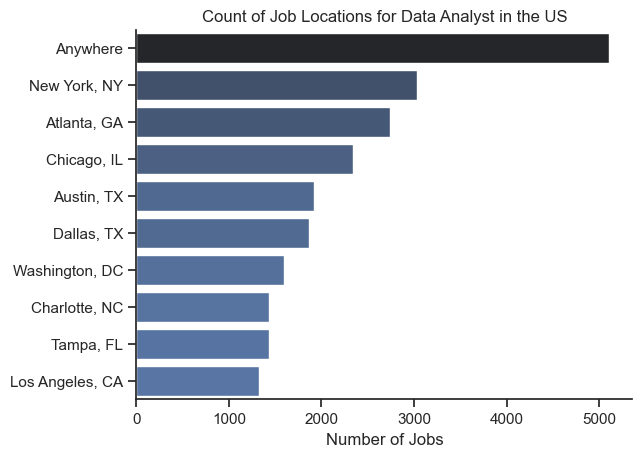

In [34]:
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Count of Job Locations for Data Analyst in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

### What are the non-salary benefit and educational barrier factors for data analyst job seekers to consider?

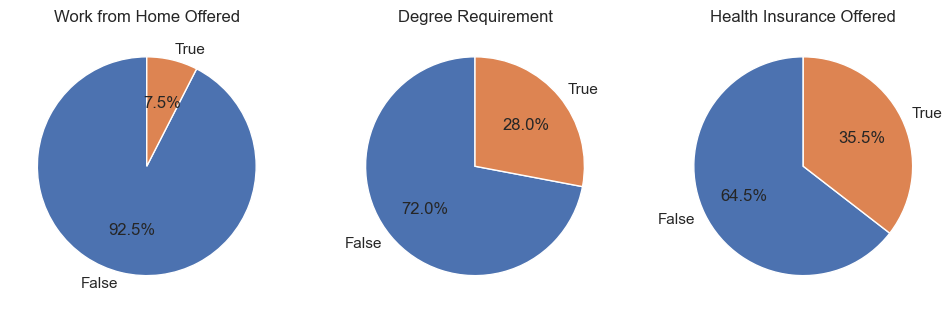

In [62]:
# Rewrite the above with a for loop
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches(12,5)

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_US[column].value_counts(), startangle=90, autopct='%1.1f%%', labels=['False', 'True'])
    ax[i].set_title(title)

# plt.suptitle('Benefit Analysis of Data Jobs', fontsize=16)
plt.show()

### Who's hiring the most?

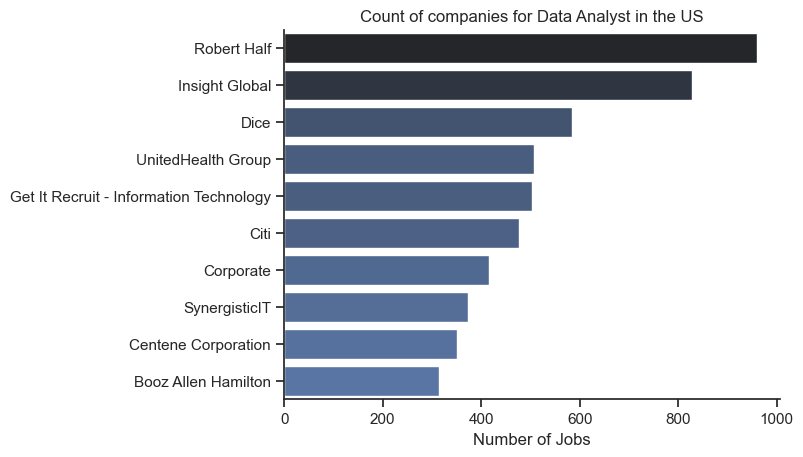

In [36]:
df_plot = df_DA_US['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Count of companies for Data Analyst in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

### What are the most demanded skill types?

In [58]:
# converting the dict-like string of job_type_skills into an actual dict
df_DA_US['job_type_skills'] = df_DA_US['job_type_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x) 

In [ ]:
# Flatten nested skill type data using the vectorized chain into a long format
df_long = (df_DA_US["job_type_skills"]
           .apply(pd.Series)
           .apply(lambda col: col.explode())
           .reset_index(drop=True)  # Only this one is required
           .melt(var_name="skill_category",
                 value_name="skill")
           .dropna())

print(df_long.head(15))

In [ ]:
# To flatten nested dictionaries with lists into long format using for loop
dfs = []
for job_type_skills_dict in df_DA_US['job_type_skills'].dropna():
    for skill_type, skills in job_type_skills_dict.items():
        temp_df = pd.DataFrame({
            'skill_type': skill_type,
            'skill': skills
        })
        dfs.append(temp_df)

df_long = pd.concat(dfs, ignore_index=True).dropna(subset=['skill'])

print(df_long.head(15))

       skill_type       skill
0     programming           r
1            sync        zoom
2   analyst_tools        word
3   analyst_tools       excel
4   analyst_tools  powerpoint
5   analyst_tools     outlook
6   analyst_tools         sas
7   analyst_tools        word
8   analyst_tools       excel
9     programming         sas
10  analyst_tools    power bi
11  analyst_tools       excel
12  analyst_tools        word
13  analyst_tools  powerpoint
14          cloud      oracle


Text(0.5, 0, 'Count of Skill Types')

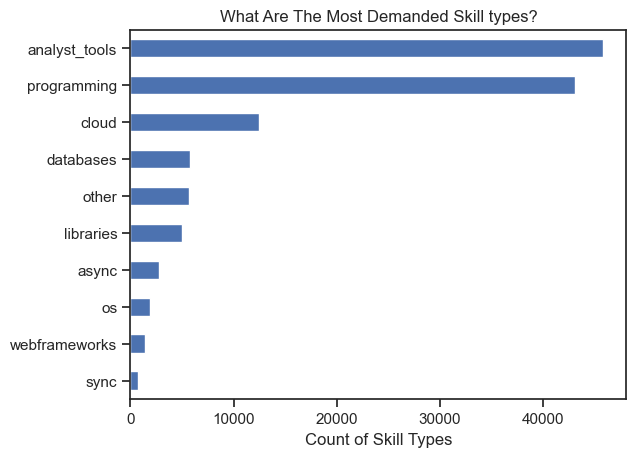

In [ ]:
# A more direct method since only skill type is required to answer this question.
skill_type = df_DA_US["job_type_skills"].apply(lambda d: list(d.keys()) if d is not None else [])

skill_type_count = skill_type.explode().value_counts()

skill_type_count[::-1].plot(kind='barh')
plt.title('What Are The Most Demanded Skill types?')
plt.ylabel('')
plt.xlabel('Count of Skill Types')